<a href="https://colab.research.google.com/github/Spontyrupple/mamaine/blob/main/King_County.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Where Do We Need to Focus? Mapping PK-12 Student Success in King County**

##**Introduction**

###On September 14 2023, the KUOW website carried a news story that quoted a study that revealed that 50% of Washington students were reading below their grade level. Education stakeholders at different levels, for example Wahinshington's Supreintendent of Public Instructuon Chris Reykdal, have expressed the need for several approaches to improve student success in Washington. In response to concerns from stakeholders about student success challenges in Washington, this spatial analysis investigates gaps in educational outcomes for Pre-K through 12 students in King County. Specifically, this study reviews King County's Fair Start Program, a collaborative initiative with local non-profits aimed at mitigating socio-economic barriers to student success.

**Data Sources**

https://gis-kingcounty.opendata.arcgis.com/datasets/bace62518e9e4b5fbd6dfc386380d417/explore
https://reportcard.ospi.k12.wa.us/ReportCard/ViewSchoolOrDistrict/103300
https://www.kuow.org/stories/new-test-scores-show-50-of-wa-students-are-reading-at-grade-level
https://data.kingcounty.gov/County-Operations/EGP-Nonprofits/4wxy-htkj/about_data
https://geo.wa.gov/datasets/12712f465fc44fb58328c6e0255ca27e_11/explore
https://www.socialexplorer.com/tables/ACS2022_5yr

##**Washington State Student Achievement Overview**

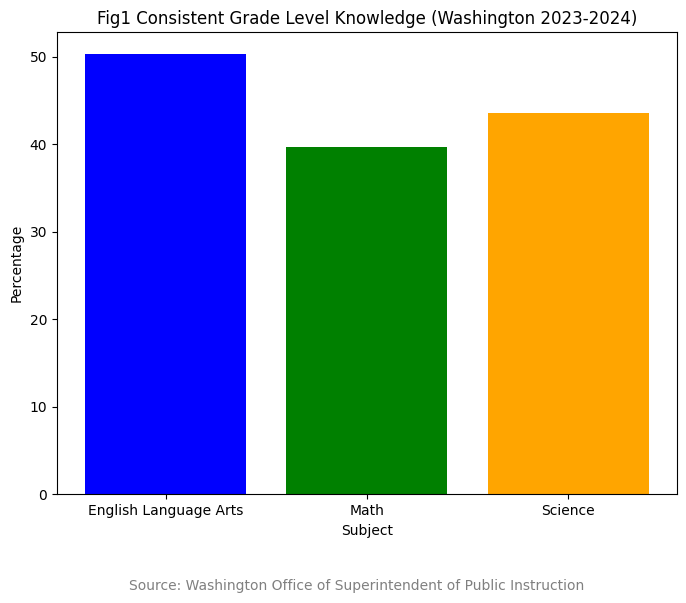

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for school enrolment and percentages
data = {
    'Subject': ['English Language Arts', 'Math', 'Science'],
    'Percentage': [50.3, 39.7, 43.5]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot histogram (bar plot)
plt.figure(figsize=(8, 6))
plt.bar(df['Subject'], df['Percentage'], color=['blue', 'green', 'orange'])

# Add labels and title
plt.xlabel('Subject')
plt.ylabel('Percentage')
plt.title('Fig1 Consistent Grade Level Knowledge (Washington 2023-2024)')

# Add data source note
plt.figtext(0.5, -0.05, 'Source: Washington Office of Superintendent of Public Instruction',
            ha='center', fontsize=10, color='gray')

# Show the plot
plt.show()


###According to the Office of Superintendent of Public Instruction (OSPI), Washington state's enrollment for the 2023-2024 academic year is 1,100,059 students. As shown in the figure above, half of enrolled students are performing at the grade-level proficiency in English Language Arts and less than half of enroled students are perfoming at the grade level proficiency in Mathematics, and Science. Proficiency rates are represented as percentages of total enrolled students.

In [3]:
%%capture
!pip install geopandas==1.0.1
!pip install mapclassify

In [4]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps: a sister of pandas; does the job;
#tho not as fancy-interactive as folium or leafmap https://geopandas.org/

import mapclassify #need for thematic map classification

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [5]:
#!python --version
gpd.__version__

'1.0.1'

In [6]:
! wget -q -O WA_County_Boundaries.zip https://github.com/Spontyrupple/mamaine/raw/refs/heads/main/WA_County_Boundaries.zip

zip_ref = zipfile.ZipFile('WA_County_Boundaries.zip', 'r') # use correct zip file name 'kingcounty.zip'
zip_ref.extractall()
zip_ref.close()
wac = gpd.read_file('WA_County_Boundaries.shp') #load the shapefile with gpd as wac, remove '.zip'

# The following line was causing the IndentationError.
# It has been unindented to be at the same level as other shell commands.
! wget -q -O kingcounty.zip https://docs.google.com/uc?id=1oZr6tGskrK9bh1Fcnr7YR4CGurSMcOAT&export=download

zip_ref = zipfile.ZipFile('kingcounty.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
county=gpd.read_file('School_Districts_in_King_County___schdst_area.shp') #load the shapefile with gpd as njC

<Axes: >

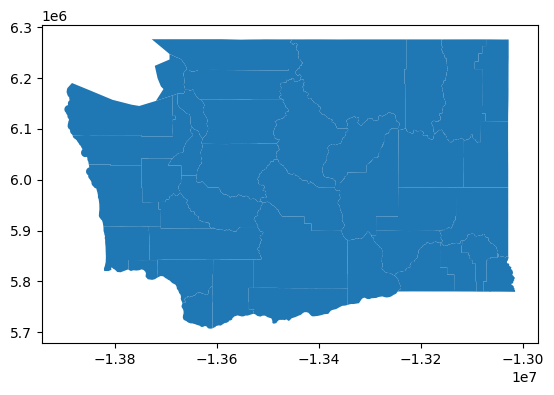

In [7]:
wac.plot()

In [8]:
!pip install pandas
import pandas as pd

doewa=pd.read_csv('https://github.com/Spontyrupple/mamaine/raw/refs/heads/main/DOrateWA.csv')

In [9]:
doewa['JURISDIC_3']=doewa ['Geo_QName'].str.replace(', Washington','')

In [10]:
wac1 = pd.merge(wac, doewa, on='JURISDIC_3',how='outer',indicator=True)
wac1[['JURISDIC_3','SE_A12004_002','SE_A12004_003','SE_A12003_002','SE_A12003_003','_merge']]


,JURISDIC_3,SE_A12004_002,SE_A12004_003,SE_A12003_002,SE_A12003_003,_merge
0,Adams County,6133,13246,104,1240,both
1,Asotin County,4221,17550,260,714,both
2,Benton County,53279,146252,695,10684,both
3,Chelan County,17955,58509,128,3523,both
4,Clallam County,12434,63259,125,2777,both
5,Clark County,116658,370836,1220,23941,both
6,Columbia County,693,3173,0,54,both
7,Cowlitz County,23538,83743,267,5054,both
8,Douglas County,10232,31579,82,2293,both
9,Ferry County,1151,5934,26,274,both


<Axes: >

Text(0.5, 1.0, 'Enrolled in School Age 3-up')

[]

[]

<Axes: title={'center': 'Enrolled in School Age 3-up'}>

<Axes: >

Text(0.5, 1.0, 'Not Enrolled in School Age 3-up')

[]

[]

<Axes: title={'center': 'Not Enrolled in School Age 3-up'}>

<Axes: >

Text(0.5, 1.0, 'Not high school grad/dropped outAge 16-19')

[]

[]

<Axes: title={'center': 'Not high school grad/dropped outAge 16-19'}>

<Axes: >

Text(0.5, 1.0, 'High school grad/enrolled Age 16-19')

[]

[]

<Axes: title={'center': 'High school grad/enrolled Age 16-19'}>

Text(0.5, 0.98, 'Overview of Washington State Student Population (king County boundaries highlighted white)')

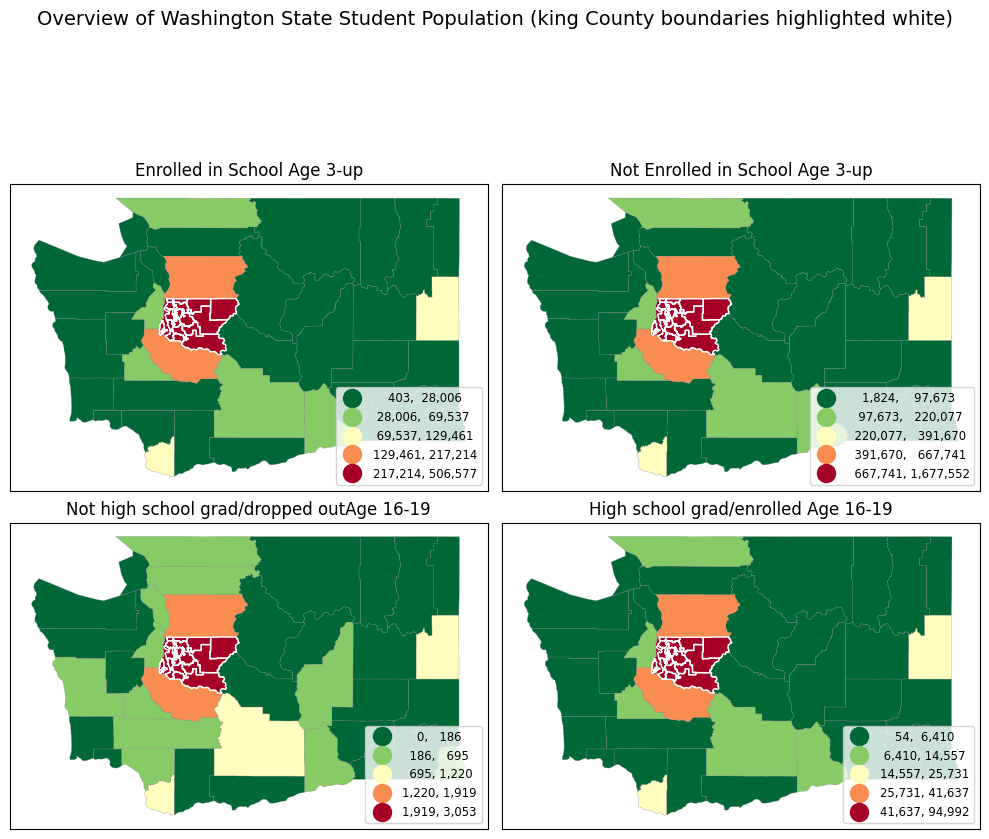

In [11]:

fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharey=True, tight_layout=True)
county=county.to_crs(wac1.crs)

# Top-left subplot
wac1.plot(ax=axs[0, 0], column='SE_A12004_002', legend=True, cmap='RdYlGn_r',
         scheme='natural_breaks', k=5, edgecolor='grey', linewidth=0.2,
         legend_kwds={"fmt": "{:,.0f}", 'loc':'lower right',
                       'title_fontsize':'medium', 'fontsize':'small',
                       'markerscale':1.4})
axs[0, 0].set_title("Enrolled in School Age 3-up")
axs[0, 0].set_xticks([]); axs[0, 0].set_yticks([])

county.plot(ax=axs[0, 0], color='none', edgecolor='white')



# Top-right subplot
wac1.plot(ax=axs[0, 1], column='SE_A12004_003', legend=True, cmap='RdYlGn_r',
         scheme='natural_breaks', k=5, edgecolor='grey', linewidth=0.2,
         legend_kwds={"fmt": "{:,.0f}", 'loc':'lower right',
                       'title_fontsize':'medium', 'fontsize':'small',
                       'markerscale':1.4})
axs[0, 1].set_title("Not Enrolled in School Age 3-up")
axs[0, 1].set_xticks([]); axs[0, 1].set_yticks([])

county.plot(ax=axs[0, 1], color='none', edgecolor='white')

# Bottom-left subplot
wac1.plot(ax=axs[1, 0], column='SE_A12003_002', legend=True, cmap='RdYlGn_r',
         scheme='natural_breaks', k=5, edgecolor='grey', linewidth=0.2,
         legend_kwds={"fmt": "{:,.0f}", 'loc':'lower right',
                       'title_fontsize':'medium', 'fontsize':'small',
                       'markerscale':1.4})
axs[1, 0].set_title("Not high school grad/dropped outAge 16-19")
axs[1, 0].set_xticks([]); axs[1, 0].set_yticks([])

county.plot(ax=axs[1, 0], color='none', edgecolor='white')

# Bottom-right subplot
wac1.plot(ax=axs[1, 1], column='SE_A12003_003', legend=True, cmap='RdYlGn_r',
         scheme='natural_breaks', k=5, edgecolor='grey', linewidth=0.2,
         legend_kwds={"fmt": "{:,.0f}", 'loc':'lower right',
                       'title_fontsize':'medium', 'fontsize':'small',
                       'markerscale':1.4})
axs[1, 1].set_title("High school grad/enrolled Age 16-19")
axs[1, 1].set_xticks([]); axs[1, 1].set_yticks([])

county.plot(ax=axs[1, 1], color='none', edgecolor='white')
fig.suptitle('Overview of Washington State Student Population (king County boundaries highlighted white)', fontsize=14)
plt.show()


King County stands out as a county with the biggest number of enrolment for a population aged 3 years and above out of all 39 counties. It has 506,577 students out of 1,766,556. This shows that about 1/3 or 28% of students in Washington State live in King County.

##**How King County Compares with other counties**

<Figure size 1000x600 with 0 Axes>

(array([ 1.,  0.,  1.,  0.,  1.,  1.,  1., 11., 15.,  8.]),
 array([ 73.3 ,  75.97,  78.64,  81.31,  83.98,  86.65,  89.32,  91.99,
         94.66,  97.33, 100.  ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'Percentage')

Text(0, 0.5, 'Frequency (Number of Counties)')

Text(0.5, 1.0, 'Histogram 2 Distribution of Graduation and enrolment Rates (Ages 16-19) by County')

Text(0.5, -0.1, 'Source: https://www.socialexplorer.com/tables/ACS2022_5yr')

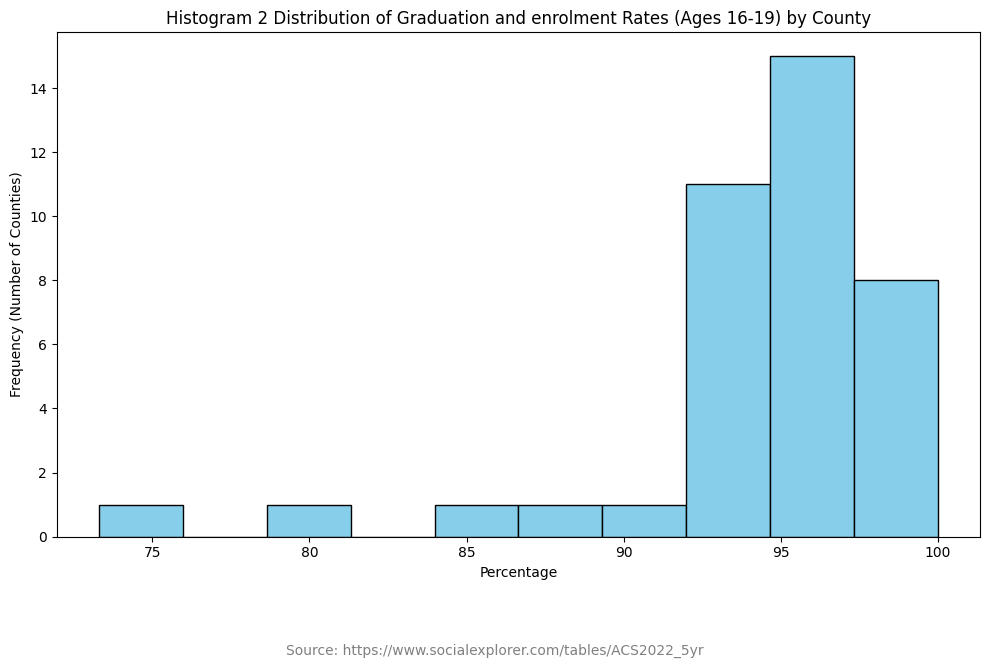

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for counties, population and percentages
data = {
    'County': ['Adams County', 'Asotin County', 'Benton County', 'Chelan County', 'Clallam County', 'Clark County', 'Columbia County', 'Cowlitz County',
               'Douglas County', 'Ferry County', 'Franklin County', 'Garfield County', 'Grant County', 'Grays Harbor County', 'Island County', 'Jefferson County',
               'King County', 'Kitsap County', 'Kittitas County', 'Klickitat County', 'Lewis County', 'Lincoln County', 'Mason County', 'Okanogan County',
               'Pacific County', 'Pend Oreille County', 'Pierce County', 'San Juan County', 'Skagit County', 'Skamania County', 'Snohomish County', 'Spokane County',
               'Stevens County', 'Thurston County', 'Wahkiakum County', 'Walla Walla County', 'Whatcom County', 'Whitman County', 'Yakima County'],

    'Population': [1344, 974, 11379, 3651, 2902, 25161, 54, 5321, 2375, 300, 6541, 203, 6206, 3369, 3347, 753,
                   98045, 11895, 4041, 870, 4042, 578, 2940, 1614, 947, 540, 43556, 570, 6225, 525, 37856, 26700,
                   2161, 13501, 132, 4334, 12252, 5514, 15540],

    'Percentage': [92.3, 73.3, 93.9, 96.5, 95.7, 95.2, 100.0, 95.0, 96.6, 91.3, 98.0, 100.0, 93.6, 92.0, 92.0, 85.3,
                   96.9, 94.9, 97.5, 93.1, 92.5, 99.7, 95.2, 98.9, 94.6, 95.7, 95.6, 99.5, 94.0, 87.8, 95.8, 96.4,
                   93.4, 95.5, 80.3, 95.7, 96.6, 99.6, 93.7]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot histogram of percentages
plt.figure(figsize=(10, 6))
plt.hist(df['Percentage'], bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Percentage')
plt.ylabel('Frequency (Number of Counties)')
plt.title('Histogram 2 Distribution of Graduation and enrolment Rates (Ages 16-19) by County')

# Add source note
plt.figtext(0.5, -0.1, 'Source: https://www.socialexplorer.com/tables/ACS2022_5yr', ha='center', fontsize=10, color='gray')

# Show the plot
plt.tight_layout()
plt.show()


##Histogram 2 Distribution of Graduation and enrolments Rates (Ages 16-19) by County illustrates the distribution of high school enrollment and graduation rates among 16–19-year-olds across counties, highlighting variations in educational attainment. It shows the percentage of the population within this age group that has either completed high school (graduated) or is currently enrolled in high school with mean at 94.19, mode 95.70 and median 95.20 As shown in the histogram, at 96.9 % King County is slightly above the mode and clustered together with other counties in the 90% range. Like most counties, King County appear to have above average percentages of graduation amongst 16–19-year-olds. King county is 23.6 percent points higher than Asotin County (73.3%) which is at the lowest and stands out as outliers on the lower end and 3.1 points below counties like Columbia County (100%), Garfield County (100%), which have particularly high enrollment percentages.

In [13]:
!pip install pandas
import pandas as pd

gradperca=pd.read_csv('https://github.com/Spontyrupple/mamaine/raw/refs/heads/main/Graduates%20Per%20Capita.csv')

In [14]:
gradperca['JURISDIC_3']=gradperca ['Geo_QName'].str.replace(', Washington','')

In [15]:
wac2b = pd.merge(wac, gradperca, on='JURISDIC_3',how='outer',indicator=True)
wac2b[['JURISDIC_3','Grad Per Capita','_merge']]

,JURISDIC_3,Grad Per Capita,_merge
0,Adams County,92,both
1,Asotin County,73,both
2,Benton County,93,both
3,Chelan County,96,both
4,Clallam County,95,both
5,Clark County,95,both
6,Columbia County,100,both
7,Cowlitz County,95,both
8,Douglas County,96,both
9,Ferry County,91,both


<Axes: >

[]

[]

Text(0.5, 316.4846462114248, 'source/definition: https://www.socialexplorer.com/tables/ACS2022_5yr')

<Axes: title={'center': 'Distribution of Graduation and enrolment Rates (Ages 16-19) by County'}, xlabel='source/definition: https://www.socialexplorer.com/tables/ACS2022_5yr'>

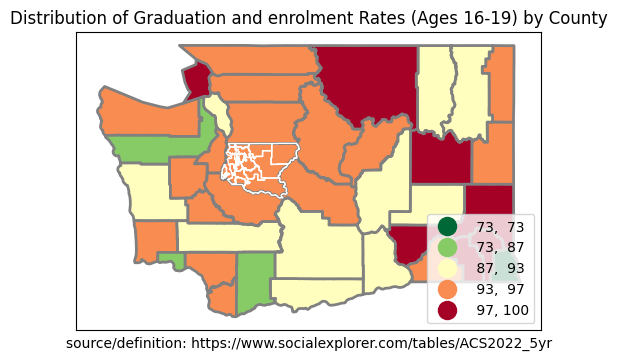

In [16]:
fig, ax = plt.subplots(1, figsize=(6,10))
county=county.to_crs(wac2b.crs)

wac2b.plot(ax=ax,column='Grad Per Capita',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
#leg1.set_title('''white color=Lake''')
ax.title.set_text("Distribution of Graduation and enrolment Rates (Ages 16-19) by County")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition: https://www.socialexplorer.com/tables/ACS2022_5yr''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as
county.plot(ax=ax, color='none', edgecolor='white')

In [17]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O kingcounty.zip https://docs.google.com/uc?id=1oZr6tGskrK9bh1Fcnr7YR4CGurSMcOAT&export=download

zip_ref = zipfile.ZipFile('kingcounty.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
kingc=gpd.read_file('School_Districts_in_King_County___schdst_area.shp') #load the shapefile with gpd as njC

In [18]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O kingcounty.zip https://docs.google.com/uc?id=1oZr6tGskrK9bh1Fcnr7YR4CGurSMcOAT&export=download

zip_ref = zipfile.ZipFile('kingcounty.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
kingc=gpd.read_file('School_Districts_in_King_County___schdst_area.shp') #load the shapefile with gpd as njC

In [19]:
kingc=kingc[['SCHDST','NAME','DSTNUM','geometry']]

In [20]:
# Convert the 'DSTNUM' column to numeric type
kingc['DSTNUM'] = pd.to_numeric(kingc['DSTNUM'])

<ipython-input-21-a5ec875db75d>:2: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  kingc.plot(ax=ax,column='DSTNUM',legend=True,scheme='natural_breaks',k=5,


<Axes: >

[]

[]

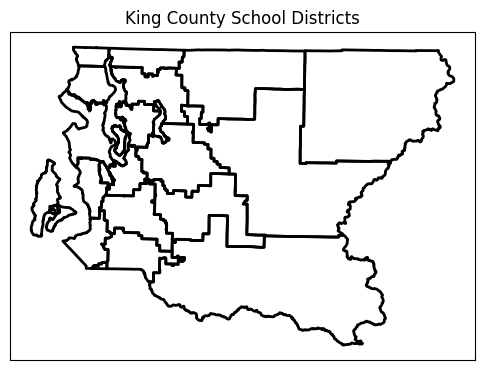

In [21]:
fig, ax = plt.subplots(1, figsize=(6,10))
kingc.plot(ax=ax,column='DSTNUM',legend=True,scheme='natural_breaks',k=5,
         color='none',edgecolor='Black',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
#leg1 = ax.get_legend()
ax.legend().remove()
#leg1.set_title('''Population Density
#2010 (pers/sq mi)''')
ax.title.set_text("King County School Districts")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

In [24]:
!pip install pandas
import pandas as pd

kingcclasslevel=pd.read_csv('https://github.com/Spontyrupple/mamaine/raw/refs/heads/main/R13737901_SL970%20(1).csv')


In [22]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O kingcounty.zip https://docs.google.com/uc?id=1oZr6tGskrK9bh1Fcnr7YR4CGurSMcOAT&export=download

zip_ref = zipfile.ZipFile('kingcounty.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
kingc1=gpd.read_file('School_Districts_in_King_County___schdst_area.shp') #load the shapefile with gpd as njC

In [25]:
kingcclasslevel['NAME']=kingcclasslevel ['Geo_QName'].str.replace(' School District, Washington','')

In [27]:
# Now perform the merge
kingc1 = pd.merge(kingc1, kingcclasslevel, on='NAME',how='outer',indicator=True)
kingc1[['NAME','SE_A12006_002','SE_A12006_003','SE_A12006_004','SE_A12006_005','_merge']]

,NAME,SE_A12006_002,SE_A12006_003,SE_A12006_004,SE_A12006_005,_merge
0,Auburn,21203.0,762.0,11175.0,5088.0,both
1,Bainbridge Island,4196.0,103.0,2078.0,1399.0,right_only
2,Bellevue,25313.0,702.0,11968.0,6710.0,both
3,Edmonds,31583.0,789.0,15103.0,6529.0,right_only
4,Enumclaw,NaN,NaN,NaN,NaN,left_only
5,Federal Way,29685.0,1112.0,14627.0,8023.0,both
6,Fife,NaN,NaN,NaN,NaN,left_only
7,Highline,25762.0,664.0,13446.0,5944.0,both
8,Issaquah,25227.0,482.0,13334.0,7409.0,both
9,Kent,38007.0,1555.0,20115.0,8261.0,both


<Axes: >

Text(0.5, 1.0, 'Students Enrolled in Public Schools')

[]

[]

<Axes: >

Text(0.5, 1.0, 'Students Enrolled in Pre-School')

[]

[]

<Axes: >

Text(0.5, 1.0, 'Students Enrolled in K-8')

[]

[]

<Axes: >

Text(0.5, 1.0, 'Students Enrolled in 9-12')

[]

[]

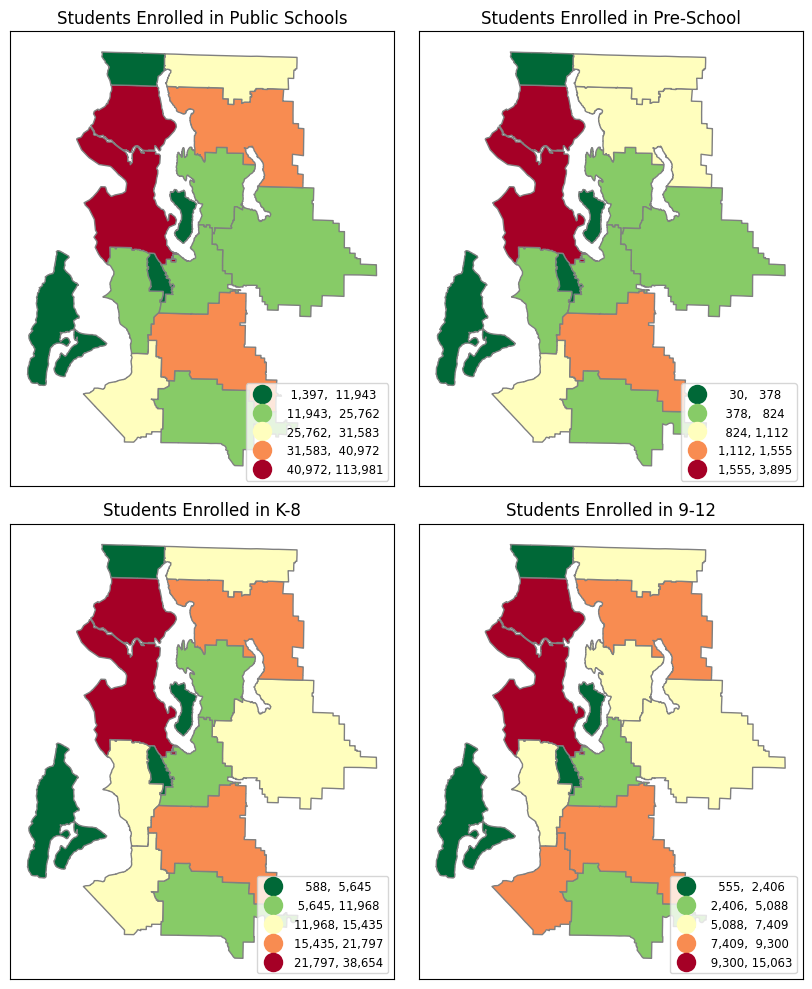

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharey=True, tight_layout=True)

# Top-left subplot
kingc1.plot(ax=axs[0, 0], column='SE_A12006_002', legend=True, cmap='RdYlGn_r',
           scheme='natural_breaks', k=5, edgecolor='grey', linewidth=1,
         legend_kwds={"fmt": "{:,.0f}", 'loc':'lower right',
                       'title_fontsize':'medium', 'fontsize':'small',
                       'markerscale':1.4})
axs[0, 0].set_title("Students Enrolled in Public Schools")
axs[0, 0].set_xticks([]); axs[0, 0].set_yticks([])

# Top-right subplot
kingc1.plot(ax=axs[0, 1], column='SE_A12006_003', legend=True, cmap='RdYlGn_r',
         scheme='natural_breaks', k=5, edgecolor='grey', linewidth=1,
         legend_kwds={"fmt": "{:,.0f}", 'loc':'lower right',
                       'title_fontsize':'medium', 'fontsize':'small',
                       'markerscale':1.4})
axs[0, 1].set_title("Students Enrolled in Pre-School")
axs[0, 1].set_xticks([]); axs[0, 1].set_yticks([])

# Bottom-left subplot
kingc1.plot(ax=axs[1, 0], column='SE_A12006_004', legend=True, cmap='RdYlGn_r',
         scheme='natural_breaks', k=5, edgecolor='grey', linewidth=1,
         legend_kwds={"fmt": "{:,.0f}", 'loc':'lower right',
                       'title_fontsize':'medium', 'fontsize':'small',
                       'markerscale':1.4})
axs[1, 0].set_title("Students Enrolled in K-8")
axs[1, 0].set_xticks([]); axs[1, 0].set_yticks([])

# Bottom-right subplot
kingc1.plot(ax=axs[1, 1], column='SE_A12006_005', legend=True, cmap='RdYlGn_r',
         scheme='natural_breaks', k=5, edgecolor='grey', linewidth=1,
         legend_kwds={"fmt": "{:,.0f}", 'loc':'lower right',
                       'title_fontsize':'medium', 'fontsize':'small',
                       'markerscale':1.4})
axs[1, 1].set_title("Students Enrolled in 9-12")
axs[1, 1].set_xticks([]); axs[1, 1].set_yticks([])

plt.show()



In [69]:
seissues=pd.read_csv('https://github.com/Spontyrupple/mamaine/raw/refs/heads/main/R13744941_SL970%20final.csv')

In [70]:
seissues['NAME']=seissues ['Geo_NAME'].str.replace(' School District','')

In [73]:
seissues.head(5)

,Geo_FIPS,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATE,Geo_COUNTY,...,SE_A13003A_001,SE_A13003A_002,SE_A13003A_003,Unnamed: 53,Unnamed: 54,Drop out rate,Unnamed: 56,Unnamed: 57,Under 18 living in poverty,NAME
0,5300001,"Enumclaw School District, Washington",wa,970,0,NaN,NaN,NaN,53,NaN,...,5720,342,5378,5.20%,0.052,5.2,6.00%,0.06,6.0,Enumclaw
1,5300300,"Auburn School District, Washington",wa,970,0,NaN,NaN,NaN,53,NaN,...,24905,2509,22396,9.00%,0.090,9.0,10.10%,0.10,10.1,Auburn
2,5300330,"Bainbridge Island School District, Washington",wa,970,0,NaN,NaN,NaN,53,NaN,...,5080,53,5027,7.00%,0.070,7.0,1.00%,0.01,1.0,Bainbridge Island
3,5300390,"Bellevue School District, Washington",wa,970,0,NaN,NaN,NaN,53,NaN,...,28712,2126,26586,0.20%,0.002,0.2,7.40%,0.07,7.4,Bellevue
4,5302820,"Federal Way School District, Washington",wa,970,0,NaN,NaN,NaN,53,NaN,...,33854,6416,27438,3.40%,0.034,3.4,19.00%,0.19,19.0,Federal Way


In [62]:
studenth=pd.read_csv('https://github.com/Spontyrupple/mamaine/raw/refs/heads/main/2018%20Homelessness.csv')

In [74]:
studenth['NAME']=studenth ['Unnamed: 2'].str.replace(' School District','')

In [75]:
kingc2=gpd.read_file('School_Districts_in_King_County___schdst_area.shp') #load the shapefile with gpd as
kingc3=gpd.read_file('School_Districts_in_King_County___schdst_area.shp') #load the shapefile with gpd as njC

In [76]:
kingc2 = pd.merge(kingc2, studenth, on='NAME',how='outer',indicator=True)
kingc2[['NAME','Percentage','_merge']]


,NAME,Percentage,_merge
0,Aberdeen,5.9,right_only
1,Adna,2.7,right_only
2,Almira,0.0,right_only
3,Anacortes,1.5,right_only
4,Arlington,3.8,right_only
...,...,...,...
323,Zillah,2.6,right_only
324,NaN,NaN,right_only
325,NaN,NaN,right_only
326,NaN,NaN,right_only


In [77]:
kingc2 = kingc2.query('_merge == "both"')

In [84]:
kingc2.head(5)

,OBJECTID,SCHDST,NAME,DSTNUM,Shape_Leng,Shape_Area,geometry,"Homeless Student Demographic Counts, by district",Unnamed: 1,Unnamed: 2,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Percentage,_merge
6,12.0,408,Auburn,17408,249545.072779,1.572039e+09,"POLYGON ((1292910.1 132190.7, 1292994.91 13218...",2018,17408,Auburn School District,...,17.5%,n<10,n<10,n<10,n<10,30,7.9%,0.019839003,2.0,both
10,9.0,405,Bellevue,17405,197777.252507,9.332731e+08,"POLYGON ((1299876.092 241273.768, 1299877.67 2...",2018,17405,Bellevue School District,...,10.2%,n<10,n<10,n<10,n<10,n<10,n<10,0.012656587,1.3,both
77,3.0,216,Enumclaw,17216,735035.021484,1.264370e+10,"POLYGON ((1388630.101 128265.156, 1388589.156 ...",2018,17216,Enumclaw School District,...,n<10,n<10,n<10,n<10,n<10,14,7.4%,0.041990669,4.2,both
83,2.0,210,Federal Way,17210,174516.492001,1.002921e+09,"POLYGON ((1279490.951 147040.874, 1279534.555 ...",2018,17210,Federal Way School District,...,23.9%,n<10,n<10,n<10,n<10,107,18.4%,0.022114983,2.2,both
85,20.0,888,Fife,27417,36310.948404,4.739885e+07,"POLYGON ((1280796.633 102459.784, 1281086.539 ...",2018,27417,Fife School District,...,28.9%,n<10,n<10,n<10,n<10,13,10.7%,0.028720627,2.9,both


In [78]:
kingc3 = pd.merge(kingc3, seissues, on='NAME',how='outer',indicator=True)
kingc3[['NAME','Drop out rate','Under 18 living in poverty','SE_A14024_001','_merge']]

,NAME,Drop out rate,Under 18 living in poverty,SE_A14024_001,_merge
0,Auburn,9.0,10.1,40731,both
1,Bainbridge Island,7.0,1.0,86747,right_only
2,Bellevue,0.2,7.4,89964,both
3,Enumclaw,5.2,6.0,55882,both
4,Federal Way,3.4,19.0,39337,both
5,Fife,12.9,11.1,42028,both
6,Highline,7.9,16.6,43156,both
7,Issaquah,1.0,5.2,82702,both
8,Kent,4.5,12.5,44898,both
9,Lake Washington,1.9,4.7,83608,both


<Axes: >

[]

[]

Text(0.5, 301.84948036941853, 'source/definition: https://ospi.k12.wa.us')

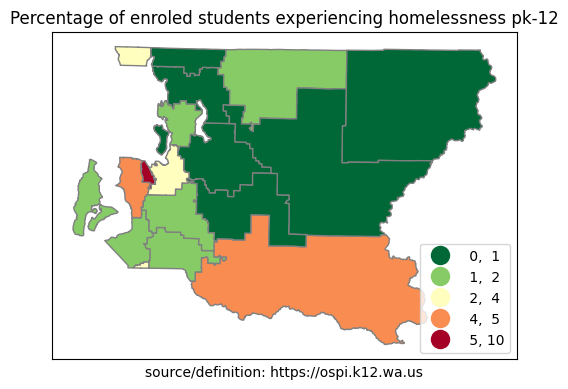

In [55]:
fig, ax = plt.subplots(1, figsize=(6,10))

kingc2.plot(ax=ax,column='Percentage',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
#leg1.set_title('''white color=Lake''')
ax.title.set_text("Percentage of enroled students experiencing homelessness pk-12")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition: https://ospi.k12.wa.us''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as


<Axes: >

Text(0.5, 1.0, '% of enroled students experiencing homelessness pk-12')

[]

[]

Text(0.5, 23.999999999999986, 'source/definition: https://ospi.k12.wa.us')

<Axes: >

Text(0.5, 1.0, '18 and below living in poverty')

[]

[]

<Axes: >

Text(0.5, 1.0, 'Per capita income')

[]

[]

<Axes: >

Text(0.5, 1.0, 'Drop out rate')

[]

[]

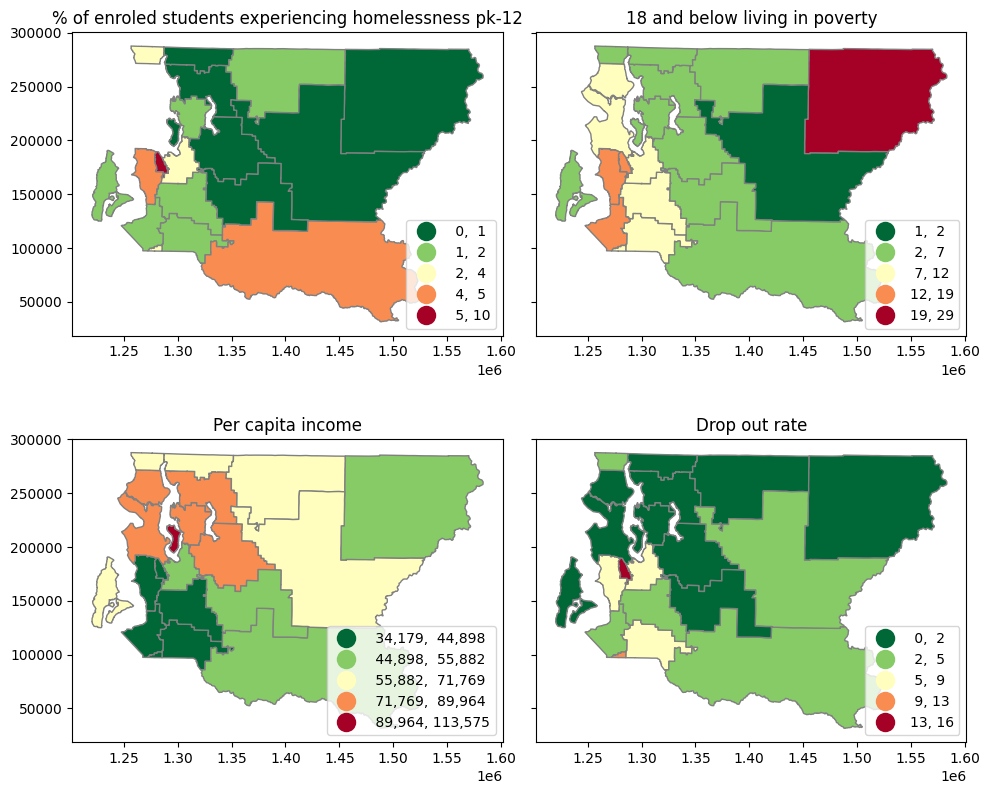

In [82]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharey=True, tight_layout=True)

# Top-left subplot
kingc2.plot(ax=axs [0,0],column='Percentage',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
#leg1.set_title('''white color=Lake''')
axs[0, 0].set_title("% of enroled students experiencing homelessness pk-12")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition: https://ospi.k12.wa.us''')

# Top-right subplot
kingc3.plot(ax=axs [0,1],column='Under 18 living in poverty',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
#leg1.set_title('''white color=Lake''')
axs[0, 1].set_title("18 and below living in poverty")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#ax.set_xlabel('''source/definition: https://ospi.k12.wa.us''')

# Bottom-left subplot
kingc3.plot(ax=axs [1, 0],column='SE_A14024_001',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
#leg1.set_title('''white color=Lake''')
axs[1, 0].set_title("Per capita income")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#ax.set_xlabel('''source/definition: https://ospi.k12.wa.us''')


# Bottom-right subplot
kingc3.plot(ax=axs [1, 1],column='Drop out rate',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
#leg1.set_title('''white color=Lake''')
axs[1, 1].set_title("Drop out rate")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#ax.set_xlabel('''source/definition: https://ospi.k12.wa.us''')

plt.show()



In [ ]:
a.Location .str.extract('.*\((.*)\).*')

,0
0,"38.552867416, -77.333597791"
1,"35.842995982, -78.682300997"
2,"33.791822988, -84.384998979"
3,"34.25075, -88.74628"
4,"47.580971991, -122.158169021"
...,...
1290,"38.822128009, -77.043229973"
1291,"48.434607013, -122.328614016"
1292,"47.700923983, -122.326514014"
1293,"47.368438988, -122.231255026"
